In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [19]:
p = {
"α" : 0.005,
"β" : 0.003,
"δ" : 0.002,
"τ_f" : 2000,
"N" : 1000,
"n_min" : 0,
"n_max" : 100}

In [21]:
def euler_noisy(p):

	Δt = p["τ_f"] / p["N"]
	states = [random.randint(p["n_min"], p["n_max"])] 
	t = 0
	t += Δt

	while t < p["τ_f"]:
		states[-1] = max(0, states[-1])

		#Define noise

		D = p["α"] + p["δ"] * states[-1] + p["β"] * states[-1]

		states.append(states[-1] + (p["α"] + p["δ"] * states[-1] - p["β"] * states[-1]) \
                      * Δt + np.random.normal(0, D * Δt))

		t += Δt

	return states


def simulator(n_sims):
	states_all = []

	for i in range(n_sims):
		states_all.append(euler_noisy(p))

	return states_all


def μ_theoretical(p, τ):
    return (p["α"]/(p["δ"] - p["β"])) * (1 - np.exp(-(p["δ"] * p["β"])*τ))

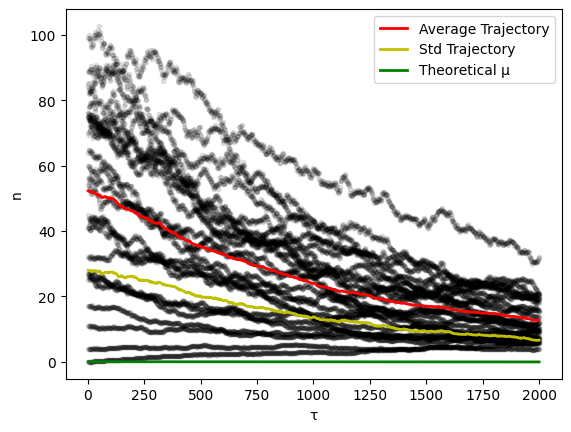

In [22]:
Δt = p["τ_f"] / p["N"]
states_all = simulator(25)
t = np.arange(Δt, p["τ_f"] + Δt, Δt)

for state in states_all:
    plt.plot(t, state, "k.", alpha = 0.1)


plt.plot(t, np.mean(states_all, axis = 0), "r-", label = "Average Trajectory", lw = 2)
plt.plot(t, np.std(states_all, axis = 0), "y-", label = "Std Trajectory", lw = 2)
plt.plot(t, μ_theoretical(p, t), "g-", label = "Theoretical μ", lw = 2)

plt.xlabel("τ")
plt.ylabel("n")
plt.legend()